# WTW 801 - Big Data : Financial Engineering & Financial Mathematics

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import pandas as pd
from google.colab import files
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Ticker selection and associated companies
ticker_company_name = {
    "AMZN": "Amazon",
    "NVDA": "NVIDIA",
    "GOOGL": "Google",
    "TSLA": "Tesla",
    "META": "Meta",
    "UNH": "UnitedHealth_Group",
    "XOM": "Exxon_Mobil",
    "JPM": "JPMorgan",
    "JNJ": "Johnson&Johnson",
    "PG": "Procter&Gamble",
    "V": "Visa_Inc",
    "HD": "Home_Depot",
    "CVX": "Chevron",
    "COST": "Costco",
    "PEP": "PepsiCo",
    "BA": "Boeing",
    "RTX": "Raytheon_Technologies",
    "WMT": "Walmart",
    "T": "AT&T",
    "NFLX": "Netflix",
    "MCD": "McDonalds"
}

tickers = [
     "AMZN","NVDA", "GOOGL", "TSLA", "META", "UNH", "XOM",
    "JPM", "JNJ", "PG", "V", "HD", "CVX", "COST", "PEP", "BA", "RTX",
    "WMT", "T", "NFLX", "MCD"]

In [3]:
# Daily closing for 5 years data extraction
start_date = "2019-10-01"
end_date = "2024-10-01"

data = yf.download(tickers, start=start_date, end=end_date, interval="1d")
closing_prices = data['Close']

[*********************100%***********************]  21 of 21 completed


In [4]:
closing_prices

Ticker,AMZN,BA,COST,CVX,GOOGL,HD,JNJ,JPM,MCD,META,...,NVDA,PEP,PG,RTX,T,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,86.782501,374.940002,283.929993,116.010002,60.299999,231.080002,129.990005,115.550003,209.020004,175.809998,...,4.350000,137.369995,123.849998,84.197609,28.255287,16.312668,217.210007,174.289993,39.283333,68.949997
2019-10-02 00:00:00+00:00,85.661499,367.359985,285.109985,112.290001,58.896000,225.550003,132.000000,113.250000,206.270004,174.600006,...,4.326000,133.940002,121.080002,82.108246,28.006042,16.208668,216.750000,169.830002,38.706669,67.150002
2019-10-03 00:00:00+00:00,86.221001,372.070007,289.000000,113.150002,59.471500,226.809998,131.190002,112.190002,210.029999,179.380005,...,4.532750,137.929993,121.739998,82.573944,28.089125,15.535333,215.360001,172.869995,38.770000,67.980003
2019-10-04 00:00:00+00:00,86.982498,375.700012,291.670013,113.849998,60.548000,227.929993,133.660004,114.620003,211.690002,180.449997,...,4.549250,140.279999,124.000000,83.832596,28.330816,15.428667,219.800003,175.979996,39.386665,68.970001
2019-10-07 00:00:00+00:00,86.633003,376.540009,293.410004,113.260002,60.412498,226.740005,133.160004,114.370003,211.919998,179.679993,...,4.608250,138.339996,122.839996,83.505348,28.444109,15.848000,221.240005,174.899994,39.076668,68.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,193.960007,155.809998,901.539978,147.449997,162.289993,400.660004,162.779999,211.589996,300.269989,563.330017,...,120.870003,169.919998,173.240005,120.040001,21.590000,254.270004,575.190002,272.779999,80.669998,117.050003
2024-09-25 00:00:00+00:00,192.529999,152.220001,908.419983,143.970001,161.490005,396.929993,160.600006,210.190002,300.470001,568.309998,...,123.510002,169.399994,172.259995,120.900002,21.559999,257.019989,576.309998,269.630005,81.400002,114.769997
2024-09-26 00:00:00+00:00,191.160004,154.580002,901.440002,141.990005,162.729996,396.700012,161.389999,209.779999,303.649994,567.840027,...,124.040001,169.690002,173.210007,120.320000,21.650000,254.220001,574.809998,271.690002,79.919998,112.800003


In [5]:
closing_prices = closing_prices.rename(columns=ticker_company_name)
closing_prices.head(5)

Ticker,Amazon,Boeing,Costco,Chevron,Google,Home_Depot,Johnson&Johnson,JPMorgan,McDonalds,Meta,...,NVIDIA,PepsiCo,Procter&Gamble,Raytheon_Technologies,AT&T,Tesla,UnitedHealth_Group,Visa_Inc,Walmart,Exxon_Mobil
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,86.782501,374.940002,283.929993,116.010002,60.299999,231.080002,129.990005,115.550003,209.020004,175.809998,...,4.35000,137.369995,123.849998,84.197609,28.255287,16.312668,217.210007,174.289993,39.283333,68.949997
2019-10-02 00:00:00+00:00,85.661499,367.359985,285.109985,112.290001,58.896000,225.550003,132.000000,113.250000,206.270004,174.600006,...,4.32600,133.940002,121.080002,82.108246,28.006042,16.208668,216.750000,169.830002,38.706669,67.150002
2019-10-03 00:00:00+00:00,86.221001,372.070007,289.000000,113.150002,59.471500,226.809998,131.190002,112.190002,210.029999,179.380005,...,4.53275,137.929993,121.739998,82.573944,28.089125,15.535333,215.360001,172.869995,38.770000,67.980003
2019-10-04 00:00:00+00:00,86.982498,375.700012,291.670013,113.849998,60.548000,227.929993,133.660004,114.620003,211.690002,180.449997,...,4.54925,140.279999,124.000000,83.832596,28.330816,15.428667,219.800003,175.979996,39.386665,68.970001
2019-10-07 00:00:00+00:00,86.633003,376.540009,293.410004,113.260002,60.412498,226.740005,133.160004,114.370003,211.919998,179.679993,...,4.60825,138.339996,122.839996,83.505348,28.444109,15.848000,221.240005,174.899994,39.076668,68.019997


In [6]:
''''Export DataFrame to Excel
closing_prices.tz_convert(None).head(5).to_excel("closing_prices.xlsx", index=True)
files.download("closing_prices.xlsx")'''

'\'Export DataFrame to Excel\nclosing_prices.tz_convert(None).head(5).to_excel("closing_prices.xlsx", index=True)\nfiles.download("closing_prices.xlsx")'

In [7]:
closing_prices.info()
closing_prices.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-01 00:00:00+00:00 to 2024-09-30 00:00:00+00:00
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Amazon                 1258 non-null   float64
 1   Boeing                 1258 non-null   float64
 2   Costco                 1258 non-null   float64
 3   Chevron                1258 non-null   float64
 4   Google                 1258 non-null   float64
 5   Home_Depot             1258 non-null   float64
 6   Johnson&Johnson        1258 non-null   float64
 7   JPMorgan               1258 non-null   float64
 8   McDonalds              1258 non-null   float64
 9   Meta                   1258 non-null   float64
 10  Netflix                1258 non-null   float64
 11  NVIDIA                 1258 non-null   float64
 12  PepsiCo                1258 non-null   float64
 13  Procter&Gamble         1258 non-null   float64
 14  Raytheon

In [8]:
# Daily returns of each stock
daily_returns = closing_prices.pct_change()
daily_returns.head(5)

Ticker,Amazon,Boeing,Costco,Chevron,Google,Home_Depot,Johnson&Johnson,JPMorgan,McDonalds,Meta,...,NVIDIA,PepsiCo,Procter&Gamble,Raytheon_Technologies,AT&T,Tesla,UnitedHealth_Group,Visa_Inc,Walmart,Exxon_Mobil
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-02 00:00:00+00:00,-0.012917,-0.020217,0.004156,-0.032066,-0.023284,-0.023931,0.015463,-0.019905,-0.013157,-0.006882,...,-0.005517,-0.024969,-0.022366,-0.024815,-0.008821,-0.006375,-0.002118,-0.025589,-0.014680,-0.026106
2019-10-03 00:00:00+00:00,0.006532,0.012821,0.013644,0.007659,0.009771,0.005586,-0.006136,-0.009360,0.018229,0.027377,...,0.047792,0.029789,0.005451,0.005672,0.002967,-0.041542,-0.006413,0.017900,0.001636,0.012360
2019-10-04 00:00:00+00:00,0.008832,0.009756,0.009239,0.006186,0.018101,0.004938,0.018828,0.021660,0.007904,0.005965,...,0.003640,0.017038,0.018564,0.015243,0.008604,-0.006866,0.020617,0.017990,0.015906,0.014563
2019-10-07 00:00:00+00:00,-0.004018,0.002236,0.005966,-0.005182,-0.002238,-0.005221,-0.003741,-0.002181,0.001086,-0.004267,...,0.012969,-0.013830,-0.009355,-0.003904,0.003999,0.027179,0.006551,-0.006137,-0.007871,-0.013774


In [9]:
daily_returns = daily_returns.dropna()

In [10]:
# Calculate mean and standard deviation for the stock daily returns
mean_returns = daily_returns.mean()
std_returns = daily_returns.std()

# Standardised the daily returns
daily_returns_standardised = (daily_returns - mean_returns) / std_returns
daily_returns_standardised = daily_returns_standardised.dropna()
daily_returns_standardised.head()

Ticker,Amazon,Boeing,Costco,Chevron,Google,Home_Depot,Johnson&Johnson,JPMorgan,McDonalds,Meta,...,NVIDIA,PepsiCo,Procter&Gamble,Raytheon_Technologies,AT&T,Tesla,UnitedHealth_Group,Visa_Inc,Walmart,Exxon_Mobil
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-02 00:00:00+00:00,-0.615215,-0.623040,0.207719,-1.448952,-1.204610,-1.352026,1.208885,-1.019611,-0.917999,-0.291669,...,-0.258452,-1.824244,-1.713865,-1.225386,-0.522154,-0.227730,-0.166566,-1.487239,-1.089098,-1.229887
2019-10-03 00:00:00+00:00,0.253353,0.405360,0.836234,0.321569,0.434532,0.273886,-0.507986,-0.497341,1.205961,0.923274,...,1.318915,2.134297,0.384430,0.250167,0.180222,-1.075842,-0.399096,0.990345,0.068351,0.537705
2019-10-04 00:00:00+00:00,0.356085,0.309952,0.544425,0.255949,0.847585,0.238177,1.476362,1.038980,0.507236,0.163939,...,0.012503,1.212463,1.373603,0.713400,0.516156,-0.239562,1.064234,0.995483,1.080636,0.638921
2019-10-07 00:00:00+00:00,-0.217778,0.075857,0.327598,-0.250747,-0.160993,-0.321406,-0.317570,-0.141798,0.045890,-0.198924,...,0.288537,-1.018958,-0.732415,-0.213278,0.241734,0.581504,0.302769,-0.379046,-0.606066,-0.663226
2019-10-08 00:00:00+00:00,-0.738127,-0.195450,-0.410752,-0.629727,-0.793687,-0.050833,-0.808181,-1.138044,-0.286299,-0.428518,...,-1.234905,-0.594020,-1.199631,-0.717384,-0.281337,0.162410,-0.328429,-0.837219,0.164074,-0.922021


In [11]:
# Perform PCA and get transformed dataset
pca = PCA()
pca.fit(daily_returns_standardised)

# Transform the daily returns data
pca_data = pca.transform(daily_returns_standardised)
pd.DataFrame(pca_data).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-3.675456,0.724164,0.273246,0.361848,-0.383960,-0.254456,0.976430,0.510956,-1.048863,0.570353,...,0.264120,1.399560,-0.427604,0.950017,0.786079,-1.125656,-0.088453,-0.389650,0.183386,-0.333695
1,1.925549,0.324729,0.443931,-0.277545,-0.359157,-0.429114,-1.546308,-0.016663,0.951094,-0.562375,...,-0.132711,-1.155825,-0.362275,0.615685,0.457555,-0.055971,-0.543009,-0.001698,1.338705,0.072325
2,3.052426,-0.678442,1.298601,-0.405270,-0.336070,-0.253464,0.373844,0.307758,-0.515201,-0.309238,...,0.095682,0.188022,0.137593,-0.350416,-0.431534,0.136056,0.203763,0.016789,0.008979,-0.285268
3,-0.771847,0.539173,-0.650726,0.678958,0.035504,0.330424,0.425697,0.090076,-0.100658,0.776308,...,0.410720,0.227654,-0.044903,0.417081,0.230190,-0.553811,0.220184,-0.350393,-0.213140,0.166374
4,-2.620642,0.036986,0.192896,0.529234,0.519698,0.536827,-0.104170,0.172517,0.173352,0.170442,...,0.597054,-0.179101,0.179910,0.158064,0.036847,0.418583,-0.159851,-0.410401,0.203129,0.156749


In [12]:
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to hold the PCA results
pca_results = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

# Output the results
pca_results.head()

,Principal Component,Explained Variance
0,PC1,0.409566
1,PC2,0.120829
2,PC3,0.089499
3,PC4,0.038264
4,PC5,0.037944


In [13]:
n = len(daily_returns_standardised)
CovarMatrix = (1/(n-1)) * (daily_returns_standardised.T).dot(daily_returns_standardised)
CovarMatrix

Ticker,Amazon,Boeing,Costco,Chevron,Google,Home_Depot,Johnson&Johnson,JPMorgan,McDonalds,Meta,...,NVIDIA,PepsiCo,Procter&Gamble,Raytheon_Technologies,AT&T,Tesla,UnitedHealth_Group,Visa_Inc,Walmart,Exxon_Mobil
Ticker,,,,,,,,,,,,,,,,,,,,,
Amazon,1.000000,0.279417,0.499766,0.165812,0.648580,0.434466,0.190835,0.264884,0.266313,0.608768,...,0.584979,0.294067,0.238748,0.182148,0.174233,0.431834,0.225572,0.410829,0.295981,0.140999
Boeing,0.279417,1.000000,0.254589,0.521845,0.377731,0.439253,0.262558,0.585362,0.472405,0.290997,...,0.332339,0.319431,0.234697,0.645187,0.354116,0.319844,0.355359,0.492487,0.153457,0.486168
Costco,0.499766,0.254589,1.000000,0.210386,0.487617,0.541439,0.373910,0.311838,0.393380,0.406025,...,0.487944,0.522990,0.503358,0.277386,0.258540,0.327474,0.389875,0.447548,0.603939,0.178325
Chevron,0.165812,0.521845,0.210386,1.000000,0.343249,0.427648,0.361106,0.639256,0.478778,0.214700,...,0.255131,0.362744,0.246343,0.615054,0.401596,0.215430,0.451497,0.514216,0.195301,0.849619
Google,0.648580,0.377731,0.487617,0.343249,1.000000,0.493842,0.311198,0.412894,0.414061,0.643179,...,0.603809,0.407722,0.344858,0.343831,0.267954,0.396757,0.363909,0.551712,0.300236,0.276074
Home_Depot,0.434466,0.439253,0.541439,0.427648,0.493842,1.000000,0.410127,0.516663,0.572920,0.424839,...,0.477859,0.562840,0.471642,0.438866,0.383403,0.333460,0.480655,0.555072,0.402750,0.325427
Johnson&Johnson,0.190835,0.262558,0.373910,0.361106,0.311198,0.410127,1.000000,0.405509,0.449877,0.204244,...,0.158875,0.601181,0.596054,0.379223,0.418016,0.085167,0.528221,0.442175,0.401274,0.289702
JPMorgan,0.264884,0.585362,0.311838,0.639256,0.412894,0.516663,0.405509,1.000000,0.534944,0.310158,...,0.333905,0.441953,0.375498,0.630024,0.498057,0.264420,0.467321,0.611241,0.246051,0.578711
McDonalds,0.266313,0.472405,0.393380,0.478778,0.414061,0.572920,0.449877,0.534944,1.000000,0.324449,...,0.332997,0.571583,0.480026,0.550513,0.405036,0.285529,0.495355,0.609887,0.308075,0.378139


In [14]:
# Export DataFrame to Excel
CovarMatrix.to_excel("CovarMatrix.xlsx", index=True)
files.download("CovarMatrix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(CovarMatrix)

In [16]:
# sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [17]:
sorted_eigenvalues_df = pd.DataFrame(sorted_eigenvalues, index = [f'PC{i+1}' for i in range(len(sorted_indices))], columns=['Eigenvalues'])
sorted_eigenvalues_df

,Eigenvalues
PC1,8.600886
PC2,2.537401
PC3,1.879488
PC4,0.803537
PC5,0.796819
PC6,0.673101
PC7,0.613623
PC8,0.545294
PC9,0.509324
PC10,0.489808


In [18]:
sorted_eigenvectors_df = pd.DataFrame(sorted_eigenvectors, columns=[f'PC{i+1}' for i in range(len(sorted_indices))])
sorted_eigenvectors_df.index = daily_returns_standardised.columns
sorted_eigenvectors_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Ticker,,,,,,,,,,,,,,,,,,,,,
Amazon,-0.194876,0.377364,0.074731,-0.177482,0.067331,0.013332,0.007820,-0.079210,-0.213616,0.050964,...,-0.035548,-0.141324,0.460886,0.288233,0.346941,-0.199627,0.370597,0.254928,0.060736,-0.065850
Boeing,-0.216488,-0.119363,0.289467,0.168729,-0.035645,0.292839,0.199254,0.417696,-0.375355,-0.101921,...,-0.313360,-0.158406,-0.088208,-0.140139,0.034705,-0.028295,0.226566,-0.403996,-0.018531,-0.032805
Costco,-0.224002,0.198428,-0.239802,-0.049571,-0.364226,0.047268,0.184823,0.061089,-0.088733,0.187592,...,0.177317,0.065251,0.221974,0.166590,-0.475739,-0.402748,-0.187685,-0.270808,-0.118965,-0.043054
Chevron,-0.222820,-0.273782,0.269996,-0.284738,-0.205225,-0.232769,-0.117588,-0.091511,0.164206,-0.079373,...,-0.040889,-0.030933,0.031611,-0.074715,-0.061631,-0.019332,-0.012843,-0.035164,0.073829,-0.734846
Google,-0.239435,0.249439,0.091912,-0.123008,0.187842,-0.212206,0.126729,-0.185481,-0.240072,-0.026020,...,0.050120,-0.200558,0.038460,-0.075865,0.259485,0.243091,-0.633186,-0.295776,0.029051,0.044487
Home_Depot,-0.258884,0.047118,-0.055331,0.154204,-0.060025,0.006931,0.245754,0.074569,0.433953,0.272664,...,-0.336593,0.172125,0.131317,0.132007,-0.093564,0.376122,-0.057959,0.011922,0.111565,0.089600
Johnson&Johnson,-0.207281,-0.153108,-0.303366,-0.010021,0.203473,-0.203048,-0.316293,0.033193,-0.342010,-0.229660,...,-0.150105,0.530290,0.243998,-0.252773,-0.097095,-0.029771,-0.004775,-0.007789,-0.041987,0.069704
JPMorgan,-0.250485,-0.186812,0.174856,-0.023156,0.047845,0.096448,0.091979,-0.036111,0.000473,0.109122,...,-0.113879,0.450311,-0.375068,0.369600,0.344272,-0.371631,-0.227011,0.129645,-0.102099,0.043464
McDonalds,-0.248813,-0.107965,-0.023695,0.353251,0.096740,-0.031552,0.191038,0.053260,0.400381,-0.313686,...,0.377173,-0.093293,0.162821,-0.301273,0.232026,-0.374350,-0.019659,-0.019223,0.093817,0.077040


In [19]:
'''# Export DataFrame to Excel
sorted_eigenvalues_df.to_excel("sorted_eigenvalues_df.xlsx", index=True)
files.download("sorted_eigenvalues_df.xlsx")'''

# Export DataFrame to Excel
sorted_eigenvectors_df.to_excel("sorted_eigenvectors_df.xlsx", index=True)
files.download("sorted_eigenvectors_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# calculate explained variance ratio with sorted eigenvalues
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance_ratio

array([0.40956601, 0.12082861, 0.08949941, 0.03826369, 0.03794378,
       0.03205241, 0.02922015, 0.0259664 , 0.02425352, 0.02332419,
       0.02060468, 0.01995827, 0.01908495, 0.01754676, 0.0165653 ,
       0.01614142, 0.01444129, 0.01409281, 0.01341187, 0.01104478,
       0.00618972])

In [21]:
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio,index=[f'PC{i+1}' for i in range(len(explained_variance_ratio))],columns=['Explained Variance Ratio'])
explained_variance_ratio_df

# Export DataFrame to Excel
explained_variance_ratio_df.to_excel("explained_variance_ratio_df.xlsx", index=True)
files.download("explained_variance_ratio_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

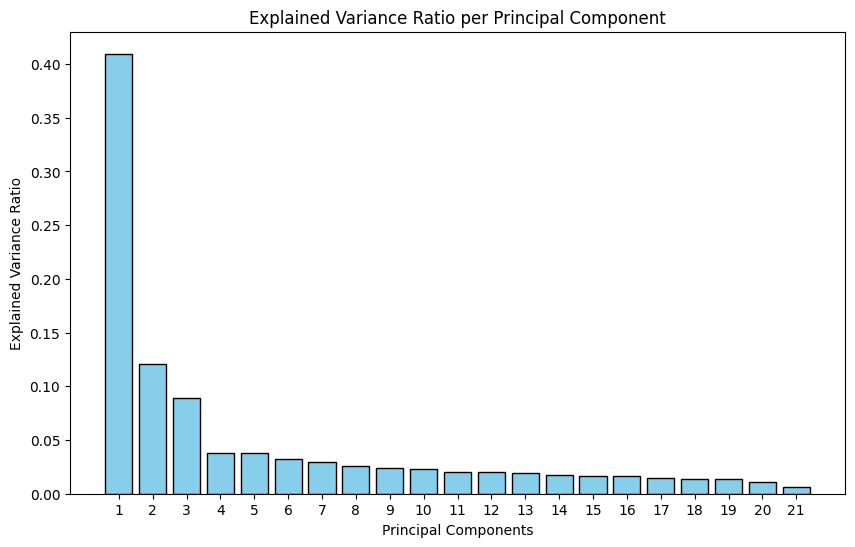

In [22]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue', edgecolor='black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

In [23]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
num_components

14

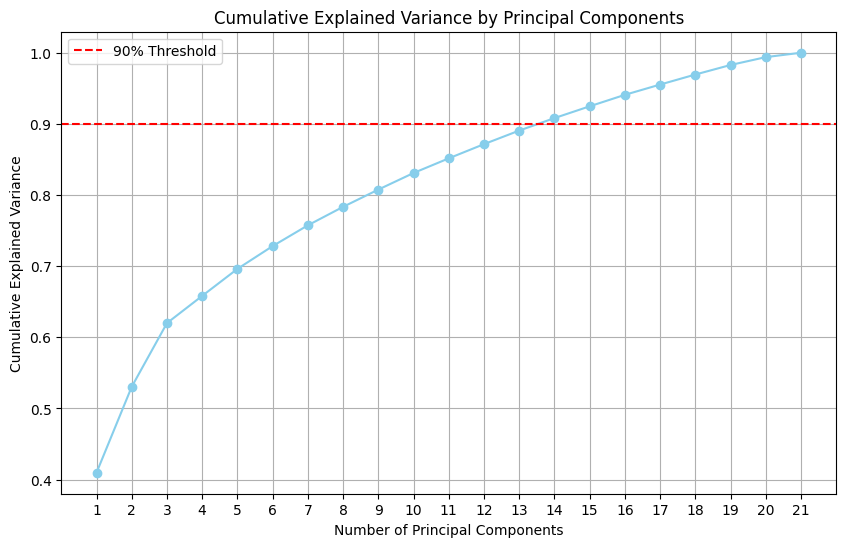

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='skyblue')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

In [25]:
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
 # Matrix Muliplication
projected_data = daily_returns_standardised @ selected_eigenvectors
projected_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Date,,,,,,,,,,,,,,
2019-10-02 00:00:00+00:00,3.675456,0.724164,-0.273246,0.361848,0.383960,-0.254456,-0.976430,0.510956,-1.048863,0.570353,0.614625,0.264120,1.399560,0.427604
2019-10-03 00:00:00+00:00,-1.925549,0.324729,-0.443931,-0.277545,0.359157,-0.429114,1.546308,-0.016663,0.951094,-0.562375,-1.027428,-0.132711,-1.155825,0.362275
2019-10-04 00:00:00+00:00,-3.052426,-0.678442,-1.298601,-0.405270,0.336070,-0.253464,-0.373844,0.307758,-0.515201,-0.309238,-0.440202,0.095682,0.188022,-0.137593
2019-10-07 00:00:00+00:00,0.771847,0.539173,0.650726,0.678958,-0.035504,0.330424,-0.425697,0.090076,-0.100658,0.776308,0.058291,0.410720,0.227654,0.044903
2019-10-08 00:00:00+00:00,2.620642,0.036986,-0.192896,0.529234,-0.519698,0.536827,0.104170,0.172517,0.173352,0.170442,1.076504,0.597054,-0.179101,-0.179910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,0.664828,0.702891,0.494035,-0.149322,-0.291201,0.546317,-0.558435,0.608941,0.826077,0.863517,1.614506,-1.329256,-0.308944,-0.457547
2024-09-25 00:00:00+00:00,1.058072,1.035957,-0.417714,0.486777,-0.482118,0.455539,0.412198,0.072998,-0.010971,0.636408,-0.387404,0.889138,-0.310463,-0.624417
2024-09-26 00:00:00+00:00,0.329148,-0.288199,-0.078917,1.185222,1.587290,-0.039781,0.443102,-0.201368,-0.060494,-0.273061,-0.256294,-0.409923,-0.053694,0.276760


In [26]:
projected_data_df = pd.DataFrame(projected_data)
projected_data_df.columns = [f'PC{i+1}' for i in range(num_components)]
projected_data_df.head(8)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Date,,,,,,,,,,,,,,
2019-10-02 00:00:00+00:00,3.675456,0.724164,-0.273246,0.361848,0.383960,-0.254456,-0.976430,0.510956,-1.048863,0.570353,0.614625,0.264120,1.399560,0.427604
2019-10-03 00:00:00+00:00,-1.925549,0.324729,-0.443931,-0.277545,0.359157,-0.429114,1.546308,-0.016663,0.951094,-0.562375,-1.027428,-0.132711,-1.155825,0.362275
2019-10-04 00:00:00+00:00,-3.052426,-0.678442,-1.298601,-0.405270,0.336070,-0.253464,-0.373844,0.307758,-0.515201,-0.309238,-0.440202,0.095682,0.188022,-0.137593
2019-10-07 00:00:00+00:00,0.771847,0.539173,0.650726,0.678958,-0.035504,0.330424,-0.425697,0.090076,-0.100658,0.776308,0.058291,0.410720,0.227654,0.044903
2019-10-08 00:00:00+00:00,2.620642,0.036986,-0.192896,0.529234,-0.519698,0.536827,0.104170,0.172517,0.173352,0.170442,1.076504,0.597054,-0.179101,-0.179910
2019-10-09 00:00:00+00:00,-1.455408,0.478207,0.265109,0.218429,-1.313971,-0.505774,1.190794,-0.282146,0.469748,0.207934,-0.529827,0.503452,-0.892098,-0.434064
2019-10-10 00:00:00+00:00,-1.104014,0.049029,0.431222,-0.913566,-0.062188,0.474485,-0.816283,0.674680,0.723269,0.562132,-0.221990,0.032170,0.252668,-0.166725
2019-10-11 00:00:00+00:00,-1.362202,-0.025253,0.726199,-0.742632,0.091821,0.034218,-0.104715,-0.061515,-0.712598,-0.054635,0.343000,-0.387320,1.561923,0.043621


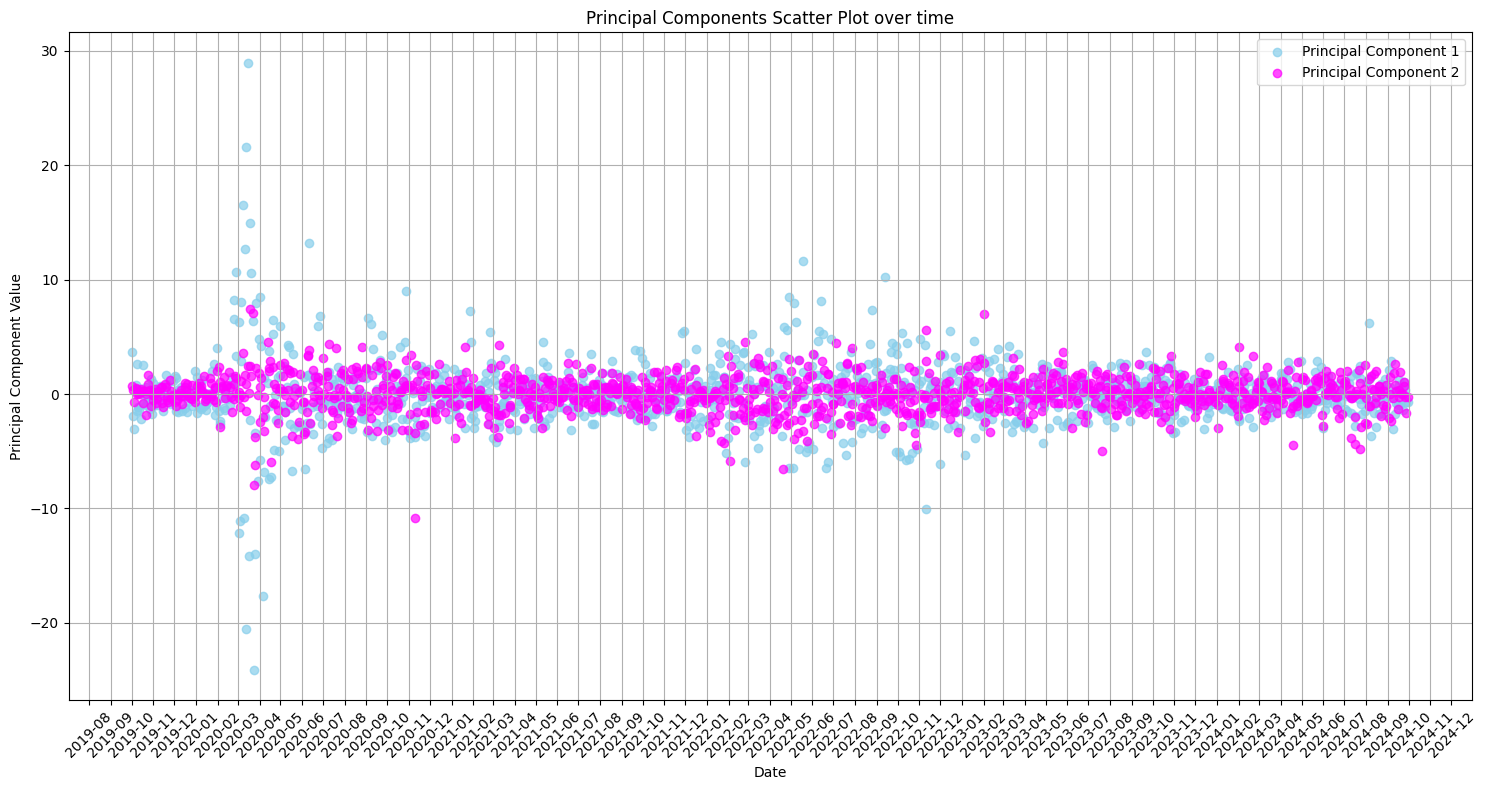

In [27]:
# Create a scatter plot for the first principal component against dates
plt.figure(figsize=(15, 8))
plt.scatter(projected_data_df.index, projected_data_df['PC1'], color='skyblue', label='Principal Component 1',alpha=0.7)
plt.scatter(projected_data_df.index, projected_data_df['PC2'], color='magenta',  label='Principal Component 2',alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.title('Principal Components Scatter Plot over time')
plt.legend()

# Formatting the x-axis for date labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

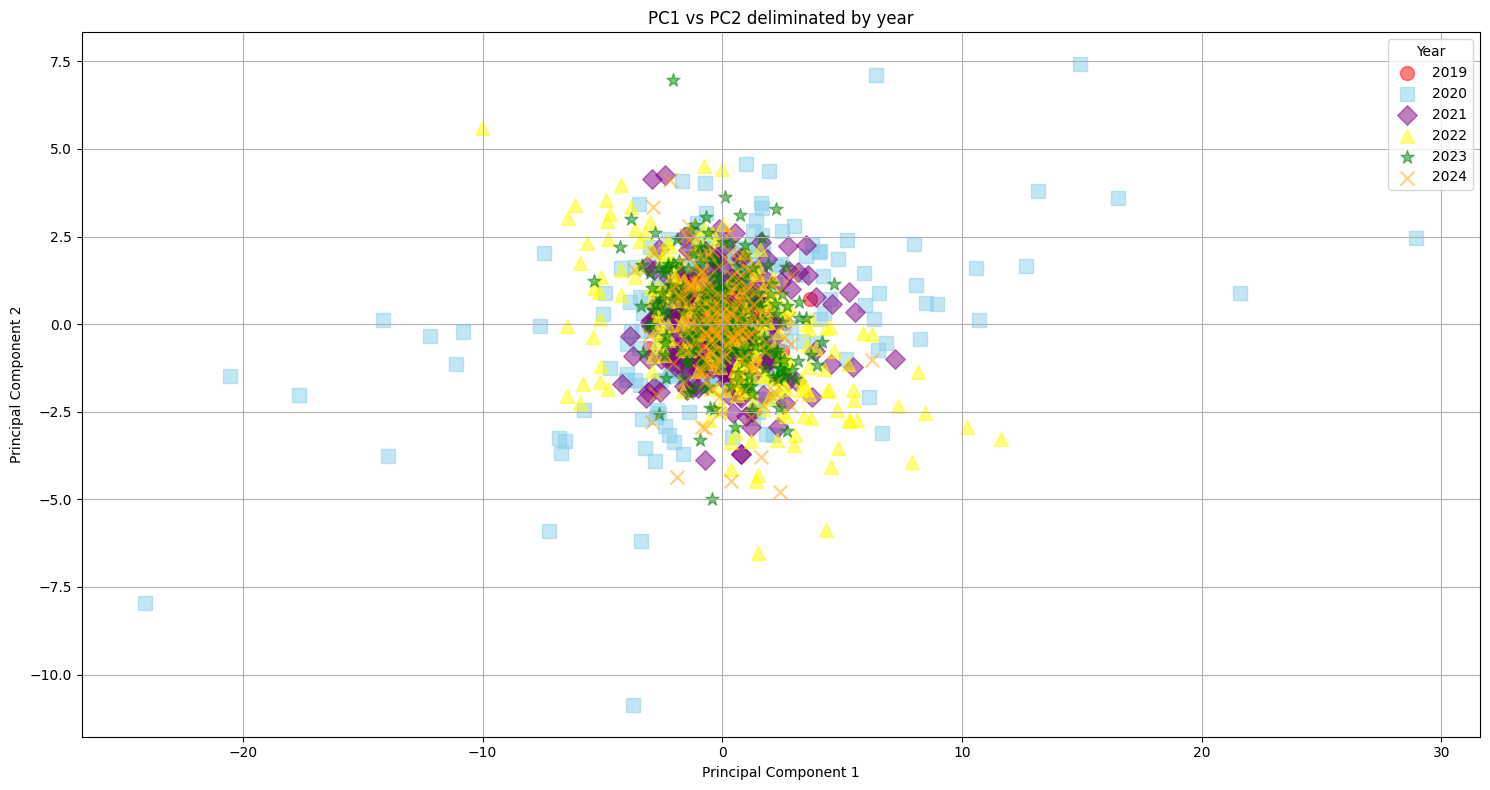

In [28]:
# Add Year column
projected_data_df['Year'] = projected_data_df.index.year

colours = ['red', 'skyblue', 'purple', 'yellow', 'green', 'orange']
markers = ['o', 's', 'D', '^', '*','x']

# Scatter plot of PC1 vs PC2 with colours and shapes based on the Year
plt.figure(figsize=(15, 8))

years = projected_data_df['Year'].unique()

for i, year in enumerate(years):
    plt.scatter(
        projected_data_df.loc[projected_data_df['Year'] == year, 'PC1'],
        projected_data_df.loc[projected_data_df['Year'] == year, 'PC2'],
        color=colours[i % len(colours)],
        marker=markers[i % len(markers)],
        label=year,
        alpha=0.5,
        s=100
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 deliminated by year')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Get first principal component
PC_1 = sorted_eigenvectors_df['PC1']
PC_1_df = pd.DataFrame(PC_1)
PC_1_df.columns = ['PC1 Loadings']
PC_1_df = PC_1_df.sort_values(by='PC1 Loadings', ascending=False)
PC_1_df

,PC1 Loadings
Ticker,
Netflix,-0.153928
Tesla,-0.154456
Walmart,-0.177203
Meta,-0.193930
AT&T,-0.194683
Amazon,-0.194876
Exxon_Mobil,-0.196450
NVIDIA,-0.204729
Johnson&Johnson,-0.207281


In [30]:
# Get first principal component
PC_1 = sorted_eigenvectors_df['PC1']
PC_1_df = pd.DataFrame(PC_1)
PC_1_df.columns = ['PC1 Loadings']

# Sort by the absolute values while keeping the vector direction
PC_1_df = PC_1_df.reindex(PC_1_df['PC1 Loadings'].abs().sort_values(ascending=False).index)
PC_1_df
# Export DataFrame to Excel
PC_1_df.to_excel("PC_1_df.xlsx", index=True)
files.download("PC_1_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# Reload balanced dataset before and after covid
start_date = '2017-09-01'
end_date = '2023-09-01'

data = yf.download(tickers, start=start_date, end=end_date, interval = '1d')

closing_prices = data['Close'].dropna()
closing_prices = closing_prices.rename(columns=ticker_company_name)
daily_returns = (closing_prices.pct_change()).dropna()

[*********************100%***********************]  21 of 21 completed


In [32]:
cutoff_date = '2020-03-01'

# Split Data
before_covid = daily_returns[daily_returns.index < cutoff_date]
after_covid = daily_returns[daily_returns.index >= cutoff_date]

daily_returns_standardised_before = (before_covid - before_covid.mean()) / before_covid.std()
daily_returns_standardised_after = (after_covid - after_covid.mean()) / after_covid.std()

# Perform PCA
pca_before = PCA()
pca_after = PCA()

# Fit PCA
pca_before.fit(daily_returns_standardised_before)
pca_after.fit(daily_returns_standardised_after)

# Get the explained variance ratios and loadings
explained_variance_before = pca_before.explained_variance_ratio_
explained_variance_after = pca_after.explained_variance_ratio_
loadings_before = pca_before.components_.T
loadings_after = pca_after.components_.T

In [33]:
loadings_before_df = pd.DataFrame(loadings_before, columns=before_covid.columns, index=[f'PC{i+1}' for i in range(loadings_before.shape[1])])
loadings_after_df = pd.DataFrame(loadings_after, columns=after_covid.columns, index=[f'PC{i+1}' for i in range(loadings_after.shape[1])])
loadings_after_df.head()

Ticker,Amazon,Boeing,Costco,Chevron,Google,Home_Depot,Johnson&Johnson,JPMorgan,McDonalds,Meta,...,NVIDIA,PepsiCo,Procter&Gamble,Raytheon_Technologies,AT&T,Tesla,UnitedHealth_Group,Visa_Inc,Walmart,Exxon_Mobil
PC1,0.193067,0.365316,-0.119632,-0.209668,0.006729,-0.037243,0.009017,-0.140314,-0.155632,0.230407,...,-0.019697,0.520047,0.233255,0.387920,-0.261536,-0.062772,-0.324523,0.052299,-0.105503,0.067218
PC2,0.214580,-0.163237,-0.270875,0.122299,-0.034807,0.325103,-0.203735,0.298485,-0.446957,-0.057620,...,-0.197105,0.043194,-0.159752,-0.019139,-0.089119,0.161918,-0.097405,-0.405915,0.058213,0.044125
PC3,0.222197,0.212638,0.228994,0.072387,0.329703,0.094604,-0.197633,-0.038903,-0.122796,0.267635,...,0.127008,0.166760,0.057335,-0.262361,0.453751,-0.326432,0.068106,-0.312354,0.181221,0.057256
PC4,0.217079,-0.304603,-0.213225,-0.208166,0.287223,-0.277963,0.082033,-0.001059,0.170114,-0.077672,...,-0.104482,0.038128,-0.048940,-0.073744,-0.009814,-0.049093,0.035037,-0.051212,-0.089643,0.731184
PC5,0.243007,0.226920,-0.117617,-0.145618,-0.147424,-0.230105,-0.164610,-0.176454,-0.222807,0.015409,...,-0.039501,-0.018886,-0.174226,0.155884,-0.039542,0.140548,0.766902,0.027508,0.048873,-0.033012


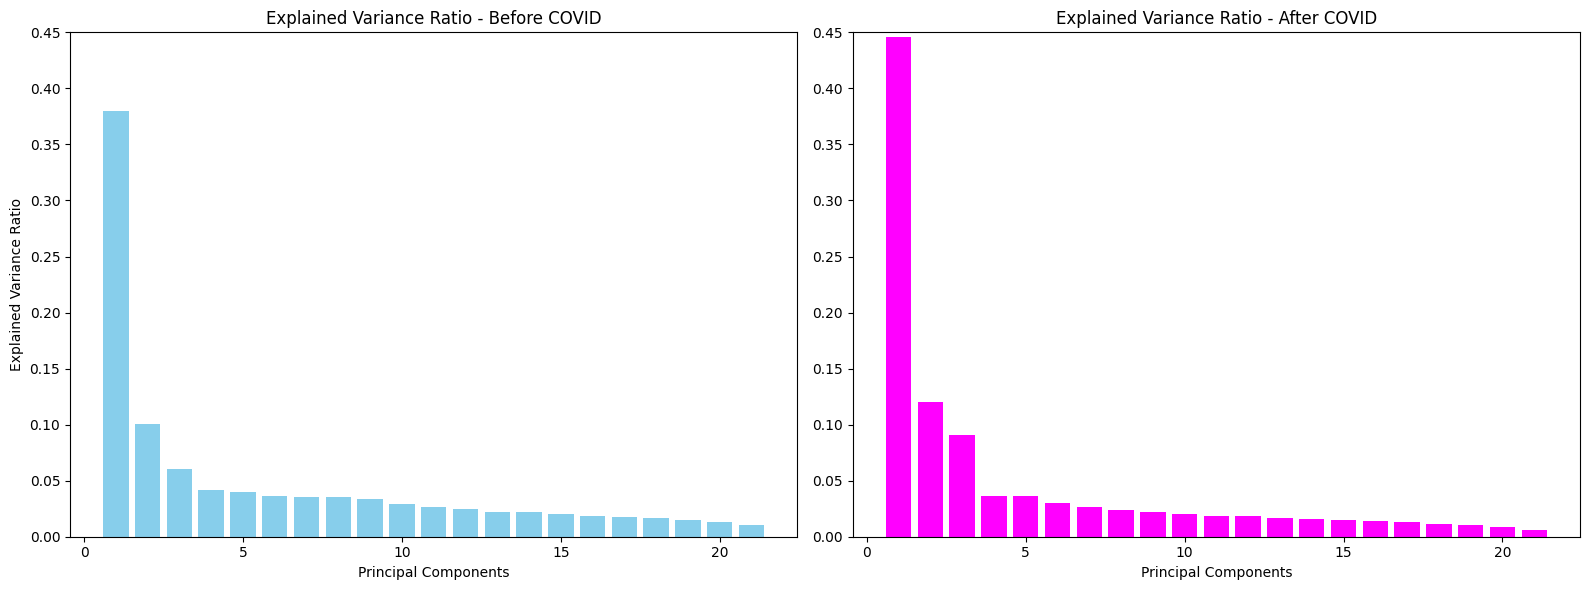

In [34]:
# Plot 1: Explained Variance Ratios Before and After COVID
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Explained variance before COVID
ax[0].bar(range(1, len(explained_variance_before) + 1), explained_variance_before, color="skyblue")
ax[0].set_title("Explained Variance Ratio - Before COVID")
ax[0].set_xlabel("Principal Components")
ax[0].set_ylabel("Explained Variance Ratio")

# Explained variance after COVID
ax[1].bar(range(1, len(explained_variance_after) + 1), explained_variance_after, color="magenta")
ax[1].set_title("Explained Variance Ratio - After COVID")
ax[1].set_xlabel("Principal Components")

# Set the same y-axis limits
max_y = 0.45
ax[0].set_ylim(0, max_y)
ax[1].set_ylim(0, max_y)

plt.tight_layout()
plt.show()

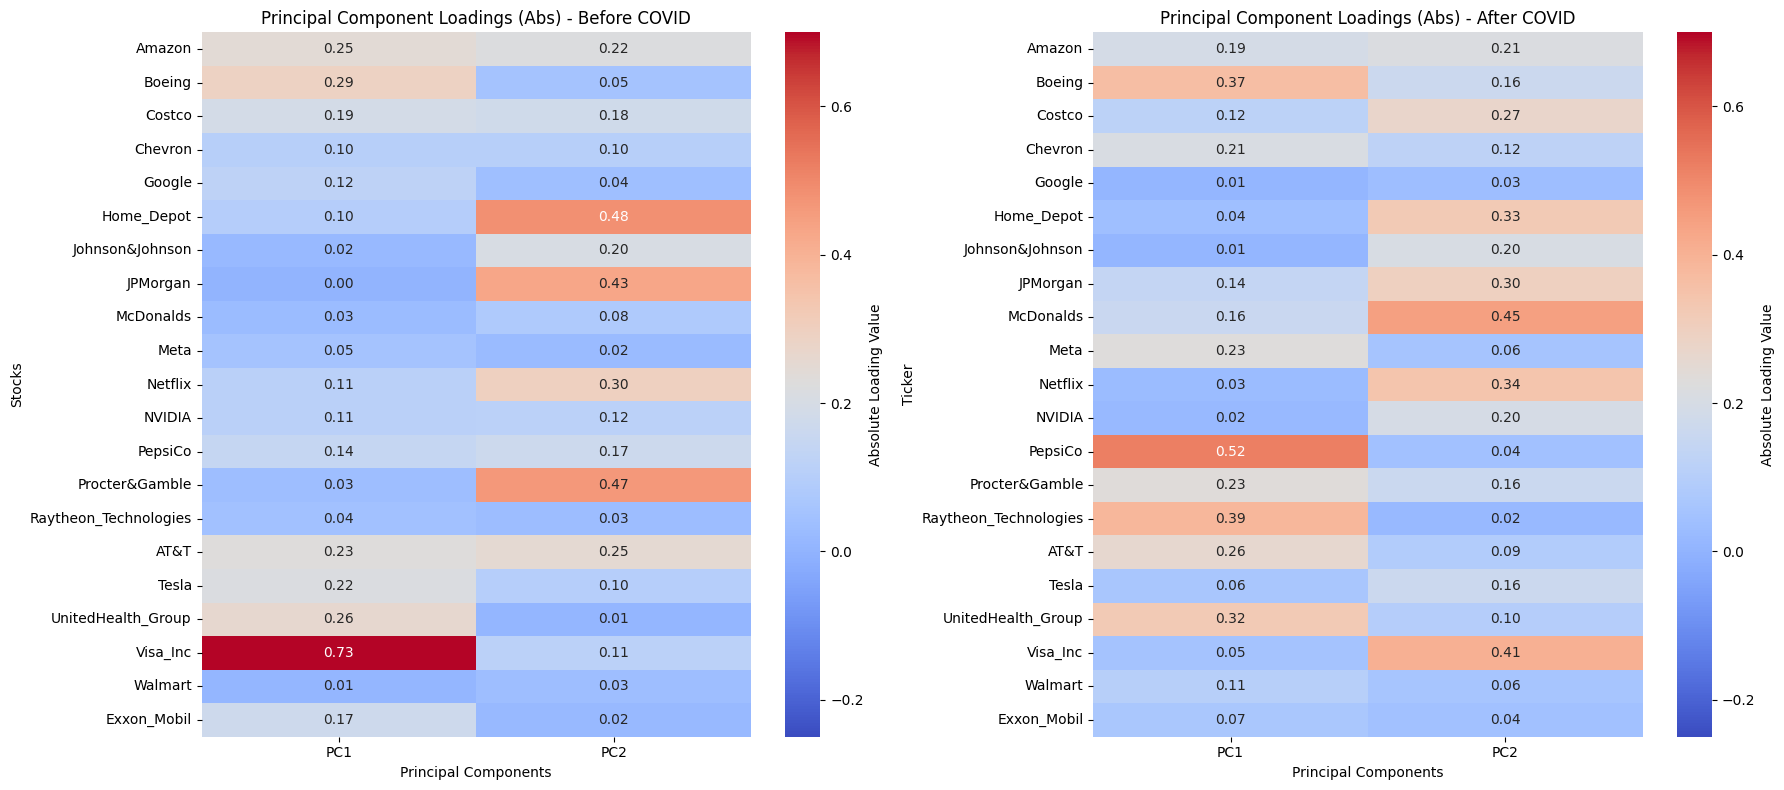

In [35]:
# Take absolute values of loadings for both before and after COVID
loadings_before_abs = loadings_before_df.iloc[:2].abs()
loadings_after_abs = loadings_after_df.iloc[:2].abs()
custom_min = -0.25
custom_max = 0.7

# Plot 2: Loadings Heatmap for Before and After COVID
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Loadings heatmap before COVID with absolute values
sns.heatmap(loadings_before_abs.T, cmap="coolwarm", annot=True, fmt=".2f", ax=ax1, cbar_kws={"label": "Absolute Loading Value"},
            vmin=custom_min, vmax=custom_max)
ax1.set_title("Principal Component Loadings (Abs) - Before COVID")
ax1.set_xlabel("Principal Components")
ax1.set_ylabel("Stocks")

# Loadings heatmap after COVID with absolute values
sns.heatmap(loadings_after_abs.T, cmap="coolwarm", annot=True, fmt=".2f", ax=ax2, cbar_kws={"label": "Absolute Loading Value"},
            vmin=custom_min, vmax=custom_max)
ax2.set_title("Principal Component Loadings (Abs) - After COVID")
ax2.set_xlabel("Principal Components")

plt.tight_layout()
plt.show()